<a href="https://colab.research.google.com/github/Praveenyeduresi/My_Projects/blob/main/House_sale_Price_Prediction/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project title : House Sale Prices Prediction**

The main aim of this project is to predict the house sales in Washington State, USA. The objective is to build a reliable model that can accurately forecast house prices and identify the main elements that affecting high value properties. By analyzing historic data, we can develop a robust prediction model and gain insights into the main factors that contribute to higher house prices.

In [ ]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
#!pip install xgboost
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Kaggle projects/house sale price prediction')

### **Data Loading**

In [ ]:
House_data=pd.read_csv("kc_house_data.csv")
House_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### **Data Exploration**

In [ ]:
print(House_data.shape)
House_data.info()

(21613, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64

In [ ]:
House_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#checking duplicates
House_data[House_data.duplicated('id')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [ ]:
#checking missing values
House_data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


### **Data Preprocessing**

**Data challenges** -

1) The data type should be changed to 'Int' for bathrooms & floors variables, and to 'date' for the date variable.

2) Duplicate rows in the 'id' column should be removed, keeping the latest 'id' by sorting the date as it contains the updated house price.

In [ ]:
House_data[['bathrooms','floors']] = House_data[['bathrooms','floors']].astype(int)

In [ ]:
# Convert 'date' column to datetime format for proper sorting
House_data['date'] = pd.to_datetime(House_data['date'], format='%Y%m%dT%H%M%S')

# Sort by 'id' and 'date' to ensure the latest record is last for each 'id'
House_data = House_data.sort_values(by=['id', 'date'])

# Drop duplicates, keeping the most recent record for each 'id'
House_data = House_data.drop_duplicates(subset='id', keep='last')

In [ ]:
#After removing duplicate rows
print(House_data.shape)
House_data[House_data.duplicated('id')]


(21436, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### **Exploratory Data Analysis**

In [ ]:
House_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Performing Univariant Analysis


In [ ]:
# filtering categorical data
House_categorical=House_data[['bedrooms','bathrooms','floors','waterfront', 'view', 'condition', 'grade']]
print(House_categorical.shape)
House_categorical.head()

(21436, 7)


,bedrooms,bathrooms,floors,waterfront,view,condition,grade
2497,6,3,2,0,0,3,7
6735,4,1,1,0,0,4,8
8411,3,1,1,0,0,3,7
8809,3,1,1,0,0,4,6
3557,4,2,1,0,0,3,7


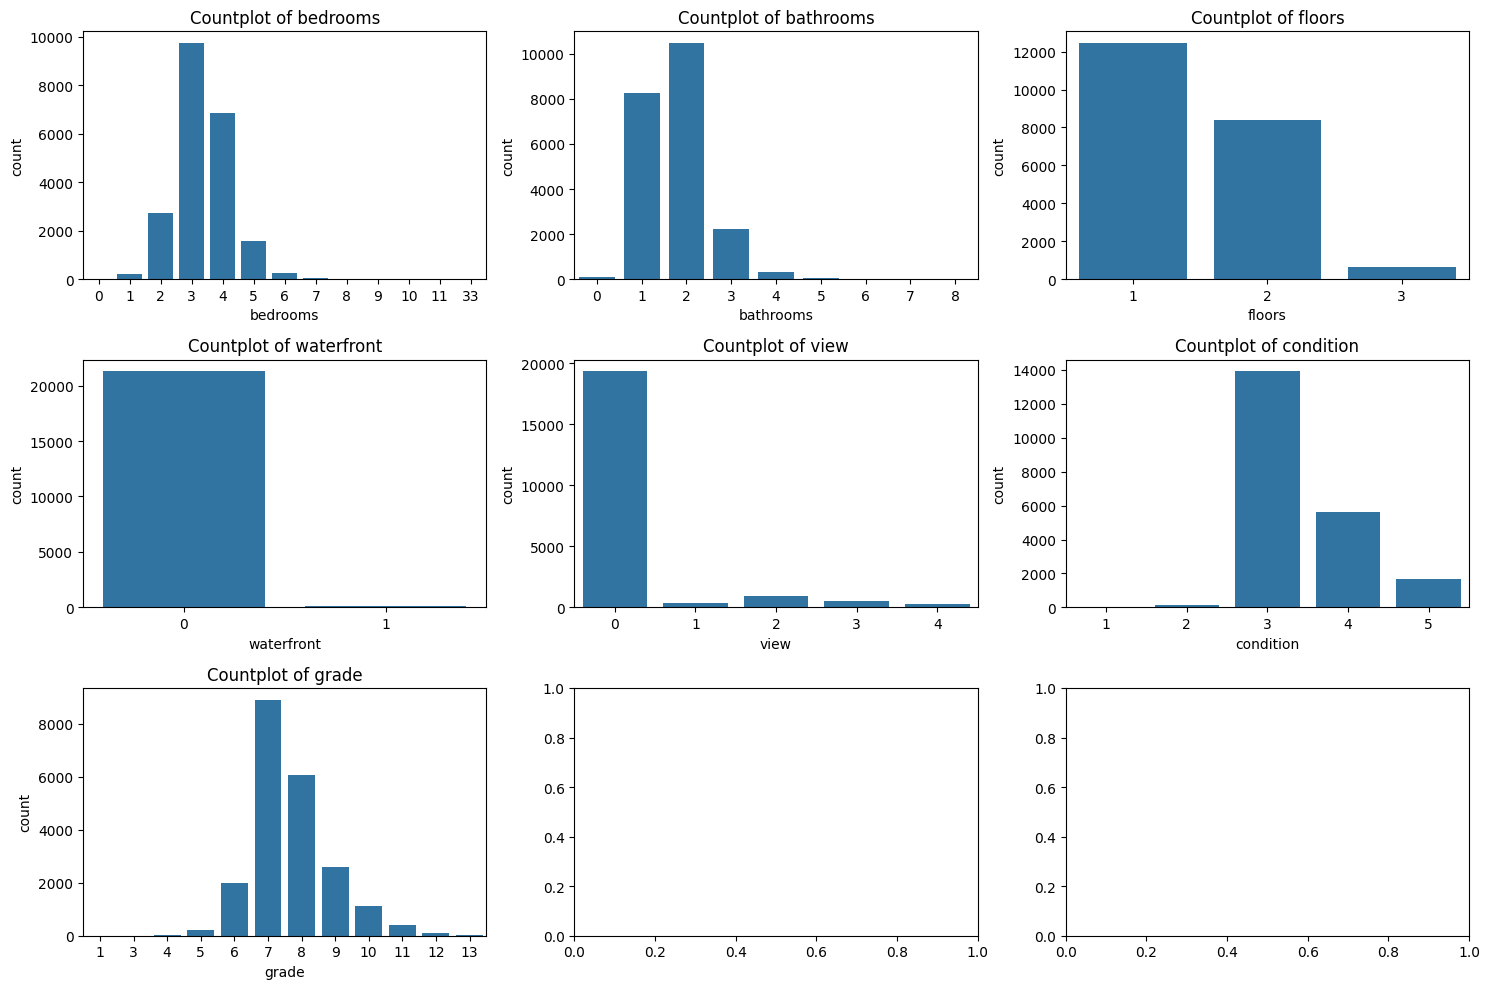

In [ ]:
# Distributions of categorical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(House_categorical.columns):
    sns.countplot(x=col, data=House_categorical, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

**Observations**

Most houses have 2 to 4 bedrooms, with very few having more than 6. Bathrooms are generally in between 1 & 2, larger numbers are more rare. The majority of houses having 1 or 2 floors, and those with 3 or more floors are less frequent. Regarding waterfront, the distribution shows that most houses do not have a waterfront. Similarly, most houses have no significant view, with higher view indices (1 to 4) being rare. In terms of condition, the houses are generally in good shape, with condition scale ranging between 3 and 5, while very few are in poor condition (indices 1 or 2). Finally, the grade distribution indicates that the majority of houses fall within the middle range (6 to 8), reflecting average to good construction and design quality. Houses with very low (1-3) or very high (10+) grades are uncommon.

In [ ]:
# filtering numerical features
house_numerical=House_data[['price','sqft_living','sqft_lot','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15']]
print(house_numerical.shape)
house_numerical.head()

(21436, 11)


,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2497,300000.0,2400,9373,2400,0,1991,0,47.3262,-122.214,2060,7316
6735,647500.0,2060,26036,1160,900,1947,0,47.4444,-122.351,2590,21891
8411,400000.0,1460,43000,1460,0,1952,0,47.4434,-122.347,2250,20023
8809,235000.0,1430,7599,1010,420,1930,0,47.4783,-122.265,1290,10320
3557,402500.0,1650,3504,760,890,1951,2013,47.5803,-122.294,1480,3504


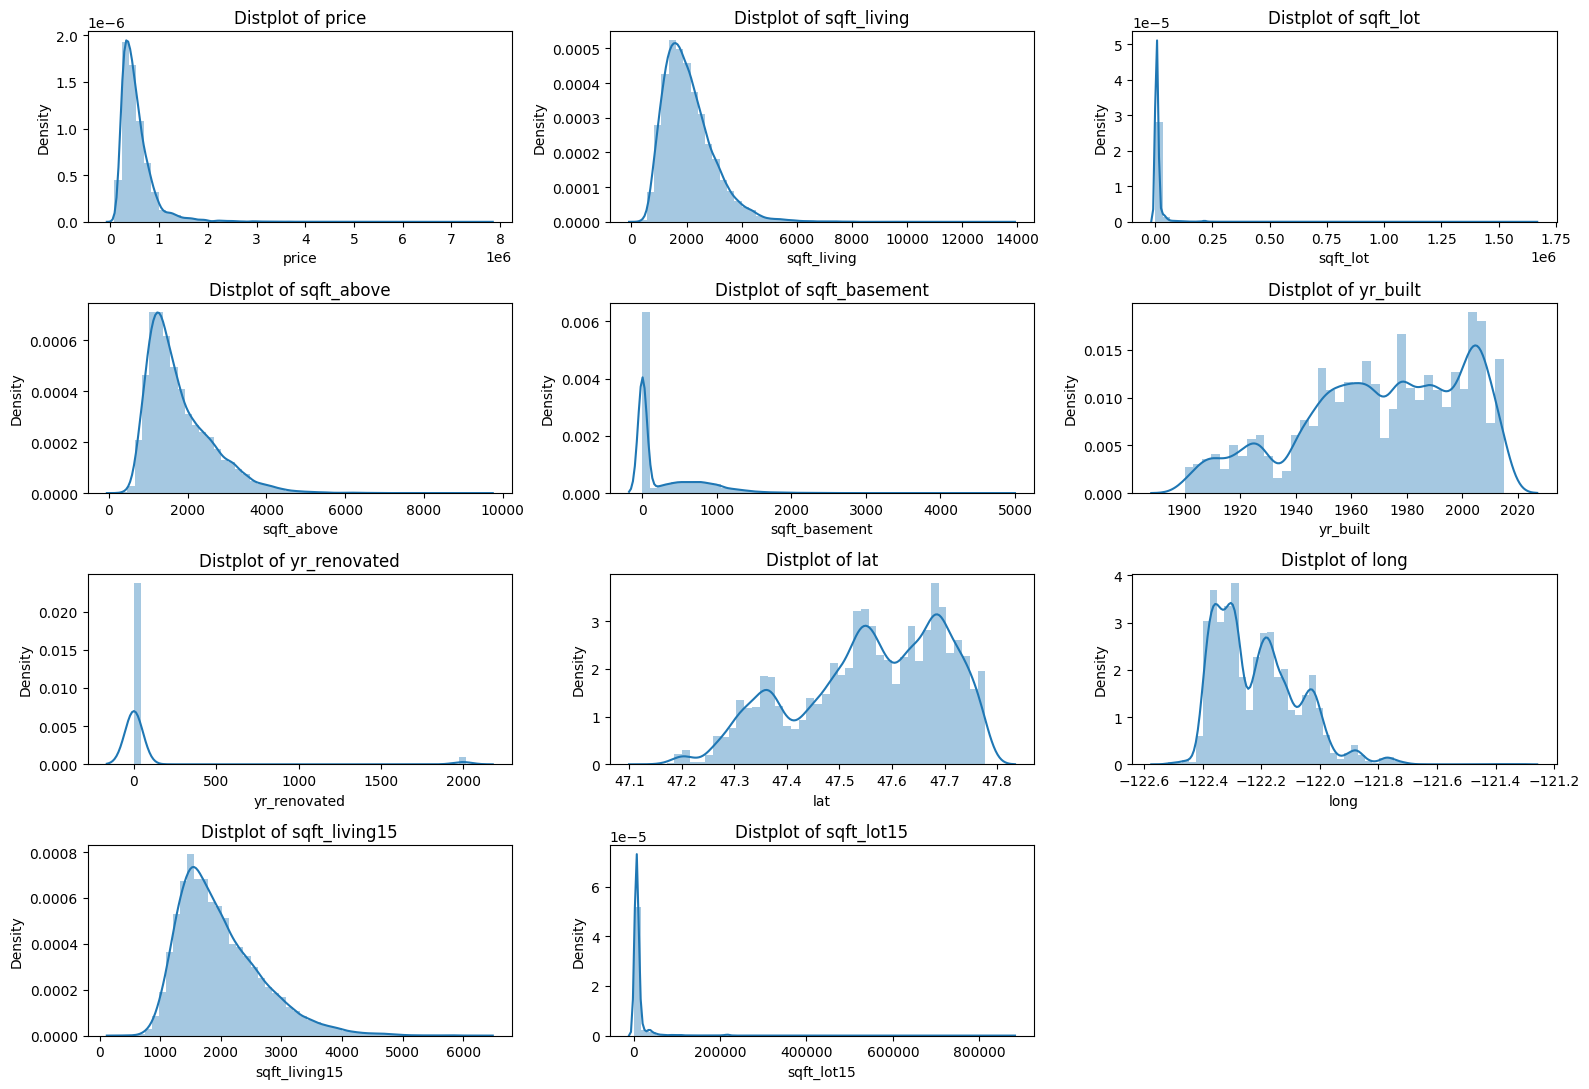

In [ ]:
# Distributions of numerical features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 11))
axes = axes.flatten()
for i, col in enumerate(house_numerical.columns):
    sns.distplot(house_numerical[col], ax=axes[i])
    axes[i].set_title(f'Distplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations-The distribution plots**

The distribution of the price variable seems right skewed with most houses having less prices and very few having high-priced houses.The living space area (sqft_living) and above-ground living space (sqft_above) both seems right skewed, with most houses having small areas. Lot size (sqft_lot) is extremely skewed, with a large number of houses having small lots and very few with extremely large lots. The yr_built variable seems multimodal distribution and most houses were built between 1940 and 2010. Latitude (lat) and longitude (long) show clustered distributions, indicating that there are more houses in particular geographic areas.

Performing Bivariant Analysis

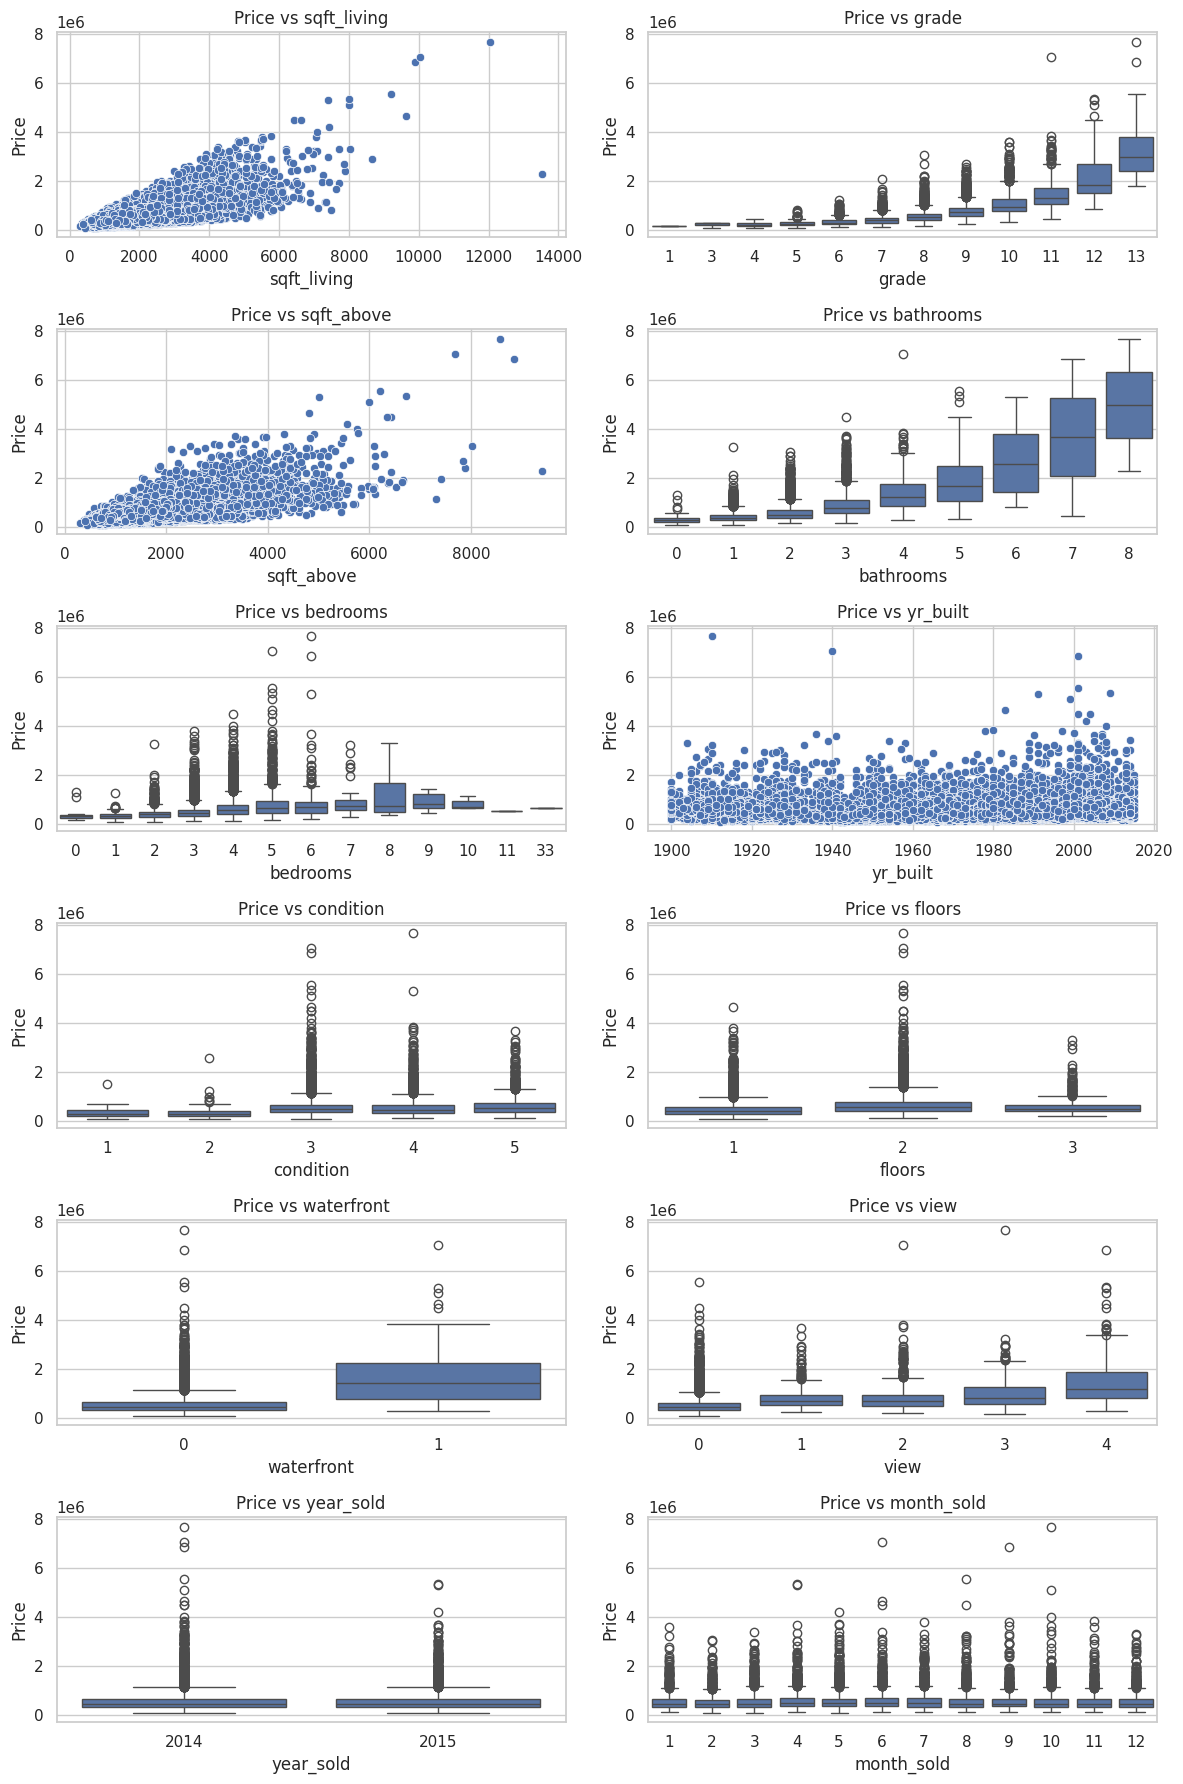

In [ ]:

# Extract Year and Month from the 'date' column for better analysis
House_data['year_sold'] = House_data['date'].dt.year
House_data['month_sold'] = House_data['date'].dt.month

# List of variables for analysis with 'price' and 'date' variables
variables = ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'yr_built', 'condition', 'floors', 'waterfront', 'view', 'year_sold', 'month_sold']

# Set up the plotting style
sns.set(style="whitegrid")

# Create subplots for each bivariate analysis (scatter plot or box plot depending on variable type)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))
axes = axes.flatten()

# Iterate through each variable and plot
for i, var in enumerate(variables):
    if House_data[var].dtype == 'object' or len(House_data[var].unique()) < 50:  # Categorical variable (e.g., 'waterfront')
        sns.boxplot(x=var, y='price', data=House_data, ax=axes[i])
    else:  # Continuous variables (e.g., 'sqft_living', 'year_sold')
        sns.scatterplot(x=var, y='price', data=House_data, ax=axes[i])

    axes[i].set_title(f'Price vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.savefig('my_plotbi.png', dpi=300, bbox_inches='tight')
plt.show()


**Observations in Bivariant Analysis**

Price shows a positive correlation with square footage (both living space and above-ground area), grade, bathrooms, and view, where higher values in these variables correspond to higher prices. Prices for waterfront properties are significantly greater when compared to non-waterfront properties. House condition and the number of floors show only a minor impact on the price, with higher floors or better conditions associated with slight increases. Older houses (based on year built) generally do not show a consistent trend in price, but recently built homes are increasing significantly.


In [ ]:
import plotly.express as px
fig = px.histogram(House_data, x='date', y='price', title='Price of houses over the years')
fig.show()

### **Modelling**

In [ ]:
#seperating dependent and independent features
X = House_data.drop(columns=['id','zipcode','price','date','year_sold','month_sold'])
y = House_data['price']

In [ ]:
# Scaling
# we can observe scaling performance on distance calculations (e.g., KNN, SVM, Neural Networks)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

**Model Selection**

In [ ]:
#Liner Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)
y_pred_lr = linear_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test_scaled, y_pred_lr)
mae = mean_absolute_error(y_test_scaled, y_pred_lr)
r2 = r2_score(y_test_scaled, y_pred_lr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.3195172574866292
Mean Absolute Error (MAE): 0.34871658284672125
R-squared (R²): 0.6951671832990318


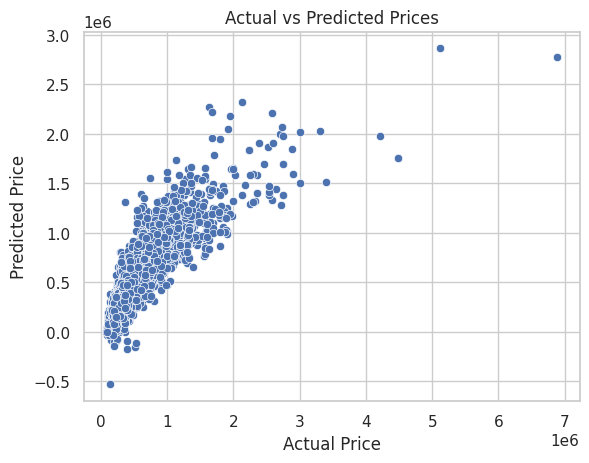

In [ ]:
# Plot residuals (actual vs predicted)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [ ]:
#DecisionTreeRegressor
DT_model = DecisionTreeRegressor(random_state=42,max_depth=9, criterion='squared_error')
DT_model.fit(X_train_scaled, y_train_scaled)
y_pred_DT=DT_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test_scaled, y_pred_DT)
mae = mean_absolute_error(y_test_scaled, y_pred_DT)
r2 = r2_score(y_test_scaled, y_pred_DT)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.21441257650023512
Mean Absolute Error (MAE): 0.25185192914279325
R-squared (R²): 0.7954414414269514


In [ ]:
#RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10, random_state=1)
RF.fit(X_train_scaled, y_train_scaled)
y_RF_pred = RF.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test_scaled, y_RF_pred)
mae = mean_absolute_error(y_test_scaled, y_RF_pred)
r2 = r2_score(y_test_scaled, y_RF_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.12535164362943174
Mean Absolute Error (MAE): 0.20099300820543467
R-squared (R²): 0.8804092933626452


In [ ]:

# from sklearn.model_selection import GridSearchCV
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Perform Grid Search with Cross-Validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Evaluate the best model
# y_pred_best = best_model.predict(X_test)
# mse_best = mean_squared_error(y_test, y_pred_best)
# mae_best = mean_absolute_error(y_test, y_pred_best)
# r2_best = r2_score(y_test, y_pred_best)

# print(f'Best Random Forest MSE: {mse_best}')
# print(f'Best Random Forest MAE: {mae_best}')
# print(f'Best Random Forest R-squared: {r2_best}')

In [ ]:
#KNN
knn_regressor = KNeighborsRegressor(n_neighbors=7)
knn_regressor.fit(X_train_scaled, y_train_scaled)
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test_scaled, y_pred_knn)
mae = mean_absolute_error(y_test_scaled, y_pred_knn)
r2 = r2_score(y_test_scaled, y_pred_knn)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.22225481479078824
Mean Absolute Error (MAE): 0.2497585468093951
R-squared (R²): 0.7879596183600095


In [ ]:
#SVR
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf')

SVR_model.fit(X_train_scaled, y_train_scaled)
y_pred_svr = SVR_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test_scaled, y_pred_svr)
mae = mean_absolute_error(y_test_scaled, y_pred_svr)
r2 = r2_score(y_test_scaled, y_pred_svr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.2502824158274376
Mean Absolute Error (MAE): 0.23282269209212278
R-squared (R²): 0.7612201156596574


In [ ]:
#XGBoost
XG_model = xgb.XGBRegressor()

XG_model.fit(X_train_scaled, y_train_scaled)

y_pred_XG = XG_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred_XG)
mae = mean_absolute_error(y_test_scaled, y_pred_XG)
r2 = r2_score(y_test_scaled, y_pred_XG)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.12295276556783341
Mean Absolute Error (MAE): 0.18947325748736962
R-squared (R²): 0.8826979232857716


In [ ]:
#ANN
model = Sequential()

# Input layer + 1st hidden layer with 64 neurons and ReLU activation
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# 2nd hidden layer with 32 neurons and ReLU activation
model.add(Dense(units=32, activation='relu'))

# Output layer with 1 neuron (for regression output)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=32, validation_split=0.2, verbose=1, callbacks=early_stopping)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Inverse transform the predictions (if target was scaled)
y_pred = scaler_y.inverse_transform(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Epoch 1/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1140 - val_loss: 0.1129
Epoch 2/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1017 - val_loss: 0.1138
Epoch 3/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0995 - val_loss: 0.1182
Epoch 4/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1005 - val_loss: 0.1150
Epoch 5/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0994 - val_loss: 0.1245
Epoch 6/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0981 - val_loss: 0.1097
Epoch 7/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0896 - val_loss: 0.1089
Epoch 8/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0891 - val_loss: 0.1065
Epoch 9/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0911 - val_loss: 0.1114
Epoch 10/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0873 - val_loss: 0.1077
Epoch 11/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0794 - val_loss: 0.1133
Epoch 12/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## **Time Series Analysis**

Using time series analysis, focus on examining how house prices change over time and develop a model that captures these trends.

In [ ]:
# Set the date column as the index (useful for time series analysis)
df = House_data.set_index('date')
print(df.head())

                 id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date                                                                        
2015-04-22  1000102  300000.0         6          3         2400      9373   
2014-05-08  1200019  647500.0         4          1         2060     26036   
2014-08-11  1200021  400000.0         3          1         1460     43000   
2015-04-01  2800031  235000.0         3          1         1430      7599   
2015-03-19  3600057  402500.0         4          2         1650      3504   

            floors  waterfront  view  condition  grade  sqft_above  \
date                                                                 
2015-04-22       2           0     0          3      7        2400   
2014-05-08       1           0     0          4      8        1160   
2014-08-11       1           0     0          3      7        1460   
2015-04-01       1           0     0          4      6        1010   
2015-03-19       1           0     0    

In [ ]:
# Resample the data to monthly average price
monthly_data = df.resample('M').mean()

# Check the resampled data
print(monthly_data.head())


                      id          price  bedrooms  bathrooms  sqft_living  \
date                                                                        
2014-05-31  4.618395e+09  549257.038924  3.392673   1.784774  2116.849456   
2014-06-30  4.564252e+09  559304.491407  3.415699   1.784487  2134.597771   
2014-07-31  4.573562e+09  546903.584362  3.396433   1.774577  2133.147234   
2014-08-31  4.627216e+09  539608.148903  3.357889   1.753396  2089.775340   
2014-09-30  4.471882e+09  533229.231429  3.360000   1.775429  2085.122857   

                sqft_lot    floors  waterfront      view  condition     grade  \
date                                                                            
2014-05-31  16047.487693  1.440183    0.005724  0.248998   3.437321  7.728105   
2014-06-30  14303.323734  1.464004    0.008825  0.241523   3.462146  7.740827   
2014-07-31  13932.499771  1.475537    0.006859  0.219936   3.444444  7.722908   
2014-08-31  14609.741379  1.460815    0.006270  0.22466

**Understanding Trends & Seasonality**

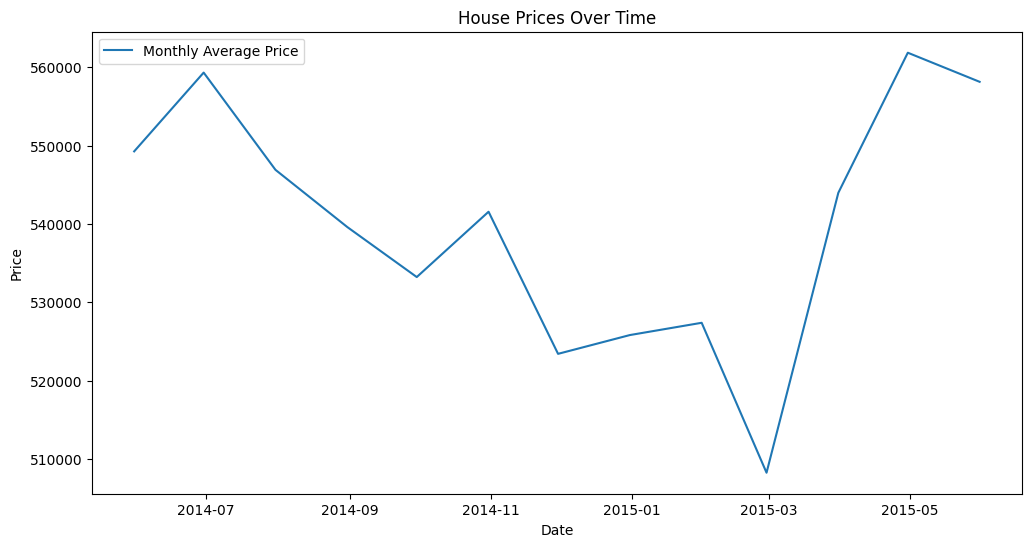

In [ ]:
# Plot the monthly average price
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['price'], label='Monthly Average Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('House Prices Over Time')
plt.legend()
plt.show()


**Observations**:The plot shows the Monthly Average House Prices over a period of time, from July 2014 to May 2015. The trend shows a **Downward Trend** from July 2014 to March 2015, indicating that house prices were decreasing during this period. After March 2015, the pattern changes to an **Upward Trend** that shows house prices were increasing.

**Checking data is stationary or not by using Augmented Dickey-Fuller (ADF) test**

In [ ]:
# ADF test on the 'price' column
result = adfuller(monthly_data['price'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("p-value is less than 0.05. So, the data is stationary.")
else:
    print("p-value is greater than 0.05. So, the data is non-stationary.")


ADF Statistic: -1.6238306253429597
p-value: 0.4707216254375032
p-value is greater than 0.05. So, the data is non-stationary.


**Eliminating trends by using differencing to convert into stationary data**

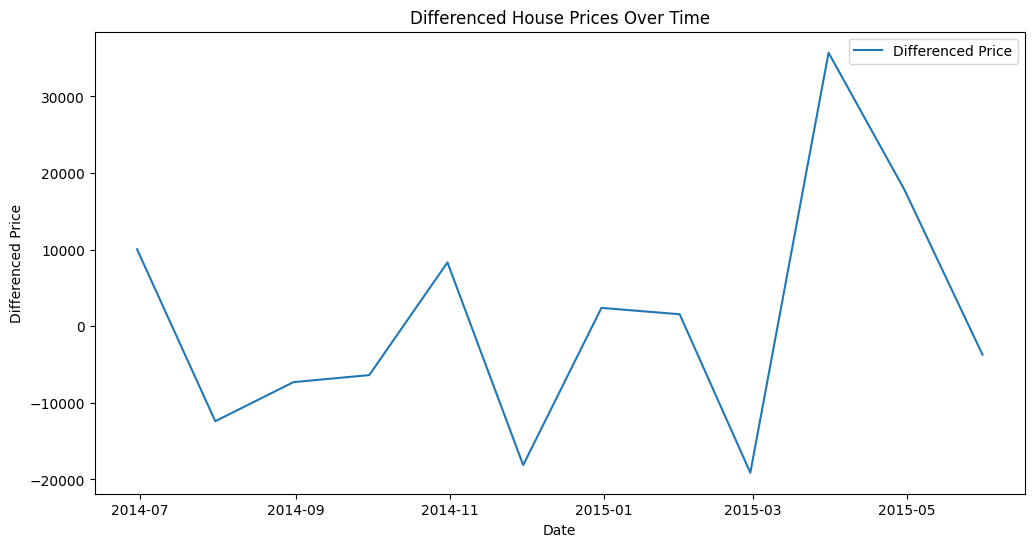

In [ ]:
# Differencing the data to make it stationary
monthly_data_diff = monthly_data['price'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_diff, label='Differenced Price')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.title('Differenced House Prices Over Time')
plt.legend()
plt.show()

#the differenced data fluctuates around zero, meaning that the trend has been effectively removed. This shows that the data is becoming more stationary.

## **Modelling**

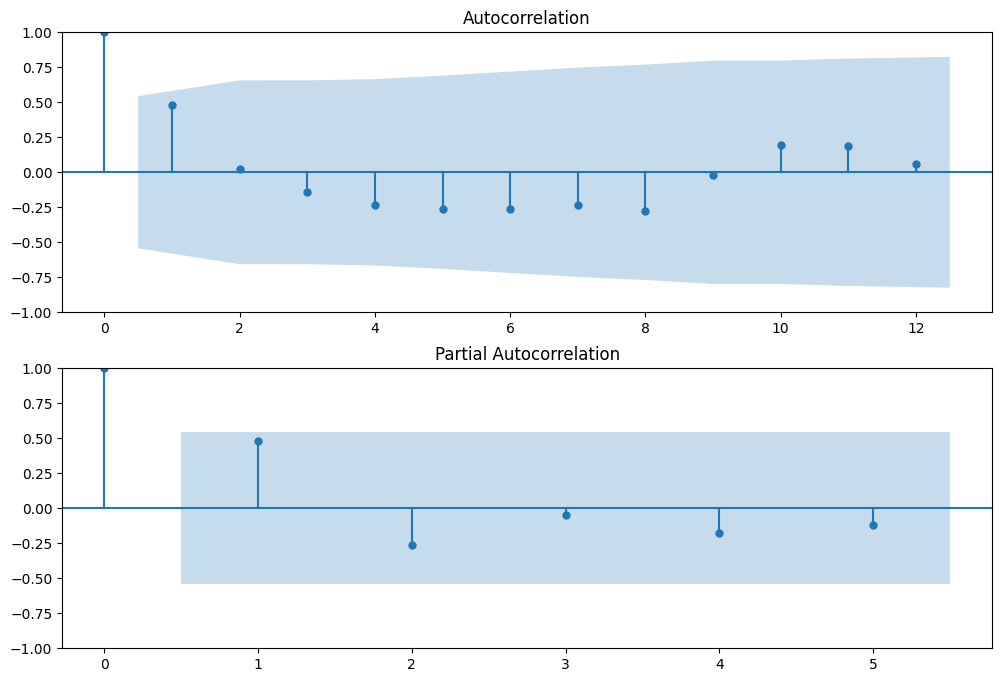

In [ ]:
#by using the ACF and PACF plots we can understand p & q values

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(monthly_data['price'], lags=12, ax=ax[0])
plot_pacf(monthly_data['price'], lags=5, ax=ax[1])
plt.show()

In [ ]:
#ARIMA - AR(Auto Regressive-p), I(Differencing-d), MA(Moving Average-q) -- d=1 i.e, (The data was differenced once to achieve stationarity.)

# Fit an ARIMA model (p, d, q) parameters according to ACF and PACF plots
model = ARIMA(monthly_data['price'], order=(2, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

# Forecast future prices
forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   13
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -131.869
Date:                Wed, 15 Jan 2025   AIC                            271.737
Time:                        11:36:19   BIC                            273.677
Sample:                    05-31-2014   HQIC                           271.019
                         - 05-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5920      2.525      0.234      0.815      -4.356       5.540
ar.L2         -0.0333      0.377     -0.088      0.930      -0.773       0.706
ma.L1         -0.5753      2.475     -0.232      0.8

In [ ]:
y_actual = monthly_data['price'][-12:]
y_pred = forecast[:12]

mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 19015.196529391713
Root Mean Squared Error (RMSE): 23400.10386286699


ADF Statistic: 0.0503975612365242
p-value: 0.962506716442019
                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                   13
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Wed, 15 Jan 2025   AIC                             12.000
Time:                                    11:32:03   BIC                                nan
Sample:                                05-31-2014   HQIC                               nan
                                     - 05-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        na

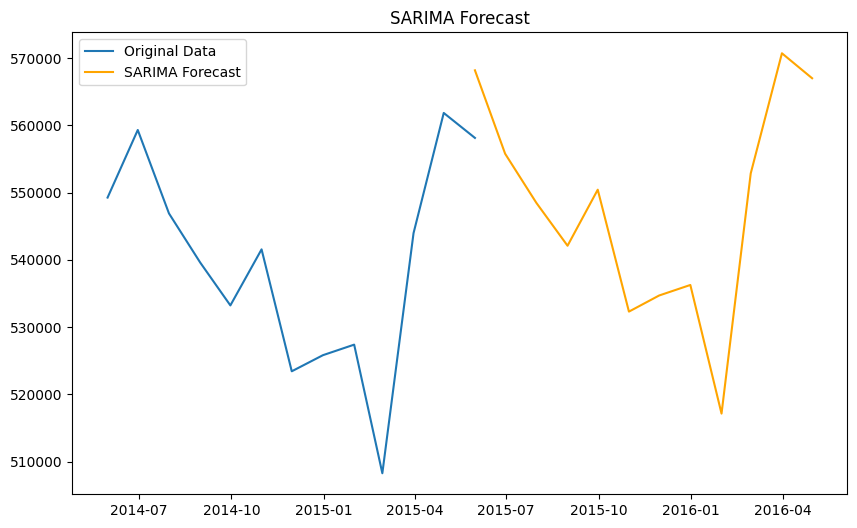

In [ ]:
#SARIMA

# Use the 'price' column as the time series data
data = monthly_data['price']

# Assuming 'data' is your time series data
# Check stationarity using ADF test after differencing
result = adfuller(data.diff().dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If seasonal period is 12 (monthly data with yearly seasonality)
seasonal_period = 12

# Define SARIMA order (p, d, q) and seasonal order (P, D, Q, m)
p, d, q = 2, 1, 1
P, D, Q, m = 1, 1, 1, seasonal_period

# Fit SARIMA model
model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, m), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = model.fit(disp=False)

# Print model summary
print(sarima_result.summary())

# Forecast next 12 months
forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M')
forecast_mean = forecast.predicted_mean

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast', color='orange')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()


In [ ]:
# Actual vs predicted prices (train-test split can be used)
y_actual1 = monthly_data['price'][-12:]
y_pred1 = forecast_mean[:12]

mae = mean_absolute_error(y_actual1, y_pred1)
rmse = np.sqrt(mean_squared_error(y_actual1, y_pred1))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 8869.772221641382
Root Mean Squared Error (RMSE): 8869.772221641382
